In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

In [2]:
def pltImp(imp, x='gain', y='col', n=30, title='Importance'):
    
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.barplot(x=x, y=y, data=imp.head(n), label=x)
    plt.subplots_adjust(left=.4, right=.9)
    plt.title(title+' TOP{0}'.format(n), fontsize=20, alpha=0.5)
    plt.show()

In [3]:
def feature_vs_y(feature, y, feature_name=None, kind='kde', bw_method=None, bins=100):
    
    if feature_name is None:
        feature_name = feature.name
    
    df = y.to_frame('y')
    df[feature_name] = feature
    y0 = df[df.y==0]
    y1 = df[df.y==1]
    y0[feature_name].name = 'Actual:0'
    y1[feature_name].name = 'Actual:1'
    if kind=='kde':
        y0[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
        y1[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
    elif kind=='hist':
        y0[feature_name].plot(kind='hist',legend=True, bins=bins)
        y1[feature_name].plot(kind='hist',legend=True, bins=bins)
        
    plt.xlabel(f'{feature_name}')
    plt.title(f'{feature_name} Distribution', fontsize=13, alpha=0.5)
    plt.show()

In [4]:
ls ../py/LOG/imp*

../py/LOG/imp_198_imp.py.csv
../py/LOG/imp_199_cv.py.csv
../py/LOG/imp_399_cv.py.csv
../py/LOG/imp_750_adversarial.py.csv
../py/LOG/imp_801_imp_lgb_onlyMe.py-2.csv
../py/LOG/imp_801_imp_lgb_onlyMe.py.csv
../py/LOG/imp_803_imp_lgb_random.py-1320.csv
../py/LOG/imp_803_imp_lgb_random.py-2785.csv
../py/LOG/imp_803_imp_lgb_random.py-5175.csv
../py/LOG/imp_803_imp_lgb_random.py-5650.csv
../py/LOG/imp_803_imp_lgb_random.py-5662.csv
../py/LOG/imp_803_imp_lgb_random.py-6142.csv
../py/LOG/imp_803_imp_lgb_random.py-6177.csv
../py/LOG/imp_803_imp_lgb_random.py-7275.csv
../py/LOG/imp_803_imp_lgb_random.py-934.csv
../py/LOG/imp_803_imp_lgb_random.py-9768.csv
../py/LOG/imp_804_cv_lgb_bb.py.csv
../py/LOG/imp_805_cv_lgb_maxwell.py.csv
../py/LOG/imp_806_holdout_xgb_maxwell.py.csv
../py/LOG/imp_BEST.csv


# adversarial

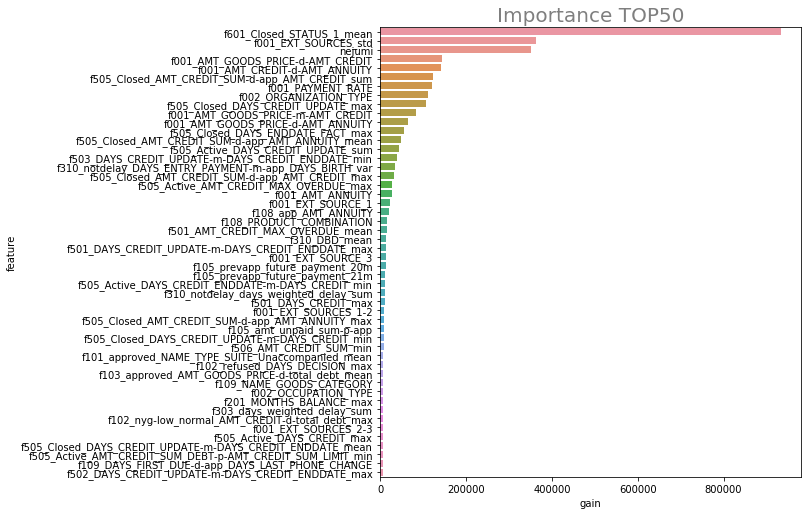

In [5]:
imp = pd.read_csv('../py/LOG/imp_750_adversarial.py.csv')
pltImp(imp, y='feature', n=50)

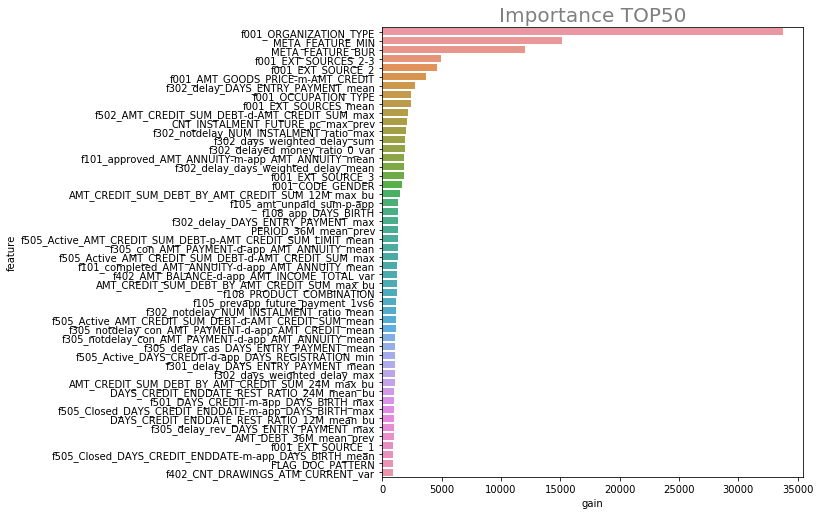

In [6]:
pltImp(imp.iloc[3:], y='feature', n=50)

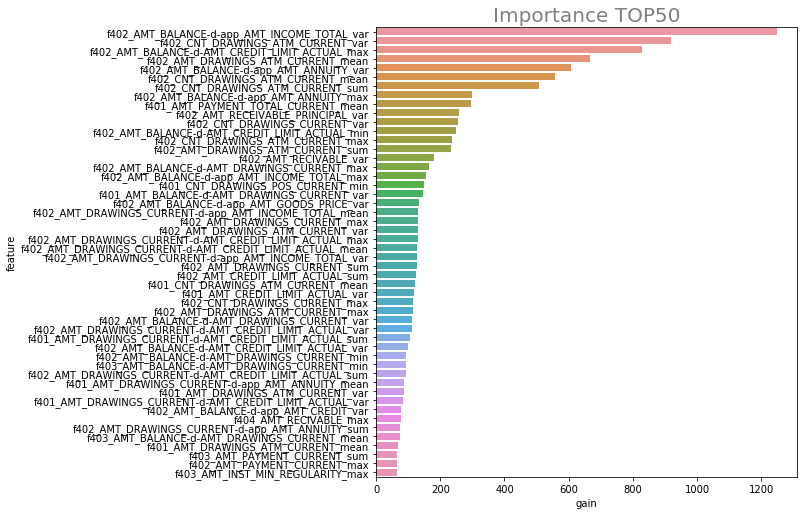

In [8]:
pltImp(imp[imp.feature.str.startswith('f40')], y='feature', n=50)

In [6]:
files = ('../feature/train_' + imp.head(99).feature + '.f').tolist()
X = pd.concat([
                pd.read_feather(f) for f in files
               ], axis=1)
y = utils.read_pickles('../data/label').TARGET

X.replace(np.inf, np.nan, inplace=True)
X.replace(-np.inf, np.nan, inplace=True)

100%|██████████| 20/20 [00:00<00:00, 72.19it/s]


In [7]:
X.columns

Index(['f001_EXT_SOURCES_mean', 'f001_EXT_SOURCES_sum',
       'f001_ORGANIZATION_TYPE', 'f001_EXT_SOURCE_3', 'f001_EXT_SOURCE_2',
       'f001_goods_price-d-credit',
       'f101_approved_AMT_GOODS_PRICE-d-total_debt_mean',
       'f001_credit-d-annuity', 'f001_OCCUPATION_TYPE',
       'f001_EXT_SOURCES_prod', 'f001_CODE_GENDER', 'f001_PAYMENT_RATE',
       'f105_approved_ratio', 'f001_goods_price-d-annuity',
       'f001_NAME_EDUCATION_TYPE', 'f105_future_vs_past_max-d-income',
       'f106_NAME_CONTRACT_STATUS-Approved_appref',
       'f105_prevapp_future_payment_13m', 'f001_maxwell_feature_1',
       'f101_approved_AMT_CREDIT-d-total_debt_mean',
       'f001_DAYS_EMPLOYED-d-DAYS_BIRTH',
       'f001_DAYS_LAST_PHONE_CHANGE-m-DAYS_EMPLOYED',
       'f105_prevapp_future_payment_12m', 'f001_goods_price-m-credit',
       'f001_AMT_GOODS_PRICE',
       'f101_approved_AMT_GOODS_PRICE-d-total_debt_max', 'f001_EXT_SOURCE_1',
       'f108_PRODUCT_COMBINATION', 'f001_OWN_CAR_AGE-m-DAYS_EMPLOY

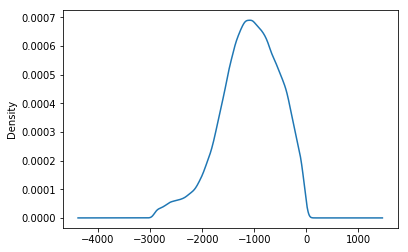

In [80]:
X.iloc[:,1].plot(kind='kde')
plt.show()

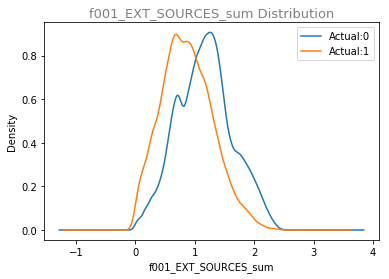

In [84]:
feature_vs_y(X.iloc[:,2], y)

# Prev

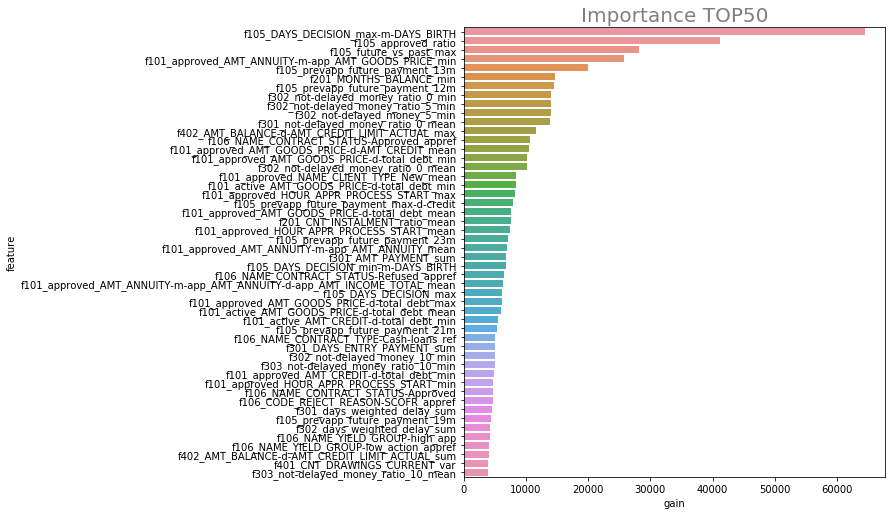

In [12]:
imp = pd.read_csv('LOG/imp_803_cv_lgb_prev.py.csv')
pltImp(imp, y='feature', n=50)

In [13]:
files = ('../feature/train_' + imp.head().feature + '.f').tolist()

In [14]:
files

['../feature/train_f105_DAYS_DECISION_max-m-DAYS_BIRTH.f',
 '../feature/train_f105_approved_ratio.f',
 '../feature/train_f105_future_vs_past_max.f',
 '../feature/train_f101_approved_AMT_ANNUITY-m-app_AMT_GOODS_PRICE_min.f',
 '../feature/train_f105_prevapp_future_payment_13m.f']

In [15]:
files.append(  '../feature/train_f001_DAYS_BIRTH.f' )

In [16]:
X = pd.concat([
                pd.read_feather(f) for f in files
               ], axis=1)
y = utils.read_pickles('../data/label').TARGET

X.replace(np.inf, np.nan, inplace=True)

100%|██████████| 20/20 [00:00<00:00, 103.84it/s]


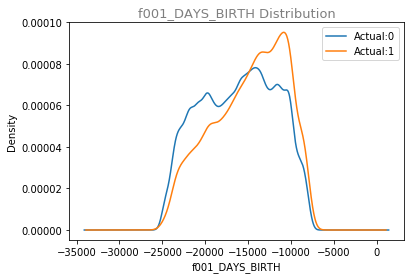

In [9]:
feature_vs_y( X.iloc[:,-1], y)

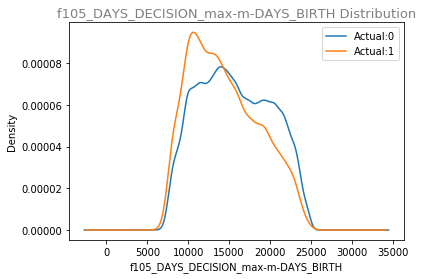

In [10]:
feature_vs_y( X.iloc[:,0], y)

In [19]:
X[['f105_DAYS_DECISION_max-m-DAYS_BIRTH', 'f001_DAYS_BIRTH']].corr('spearman')

,f105_DAYS_DECISION_max-m-DAYS_BIRTH,f001_DAYS_BIRTH
f105_DAYS_DECISION_max-m-DAYS_BIRTH,1.000000,-0.992582
f001_DAYS_BIRTH,-0.992582,1.000000


In [22]:
utils.remove_feature(X, corr_limit=0.98)

remove corr>=0.98: Index(['f001_DAYS_BIRTH'], dtype='object')


In [ ]:
X.head()

# ALL

In [11]:
imp = pd.read_csv('LOG/imp_801_cv_lgb.py.csv')
files = ('../feature/train_' + imp.head().feature + '.f').tolist()
X = pd.concat([
                pd.read_feather(f) for f in files
               ], axis=1)
y = utils.read_pickles('../data/label').TARGET

X.replace(np.inf, np.nan, inplace=True)
X.replace(-np.inf, np.nan, inplace=True)

100%|██████████| 20/20 [00:00<00:00, 1682.67it/s]


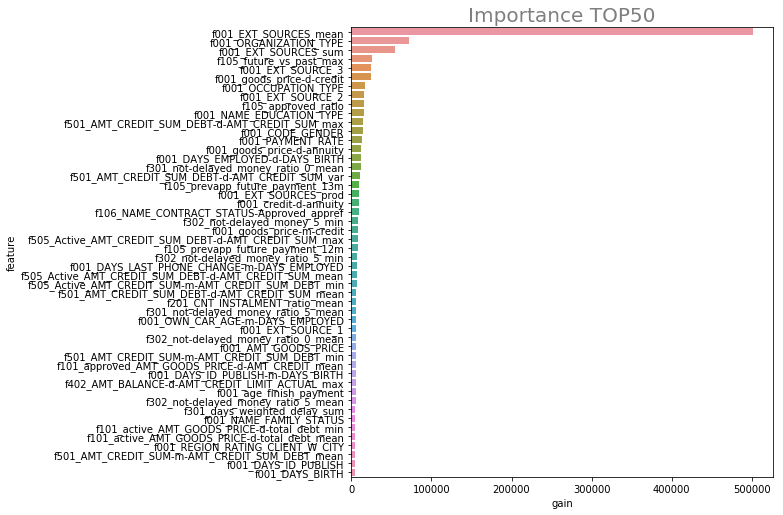

In [83]:
pltImp(imp, y='feature', n=50)

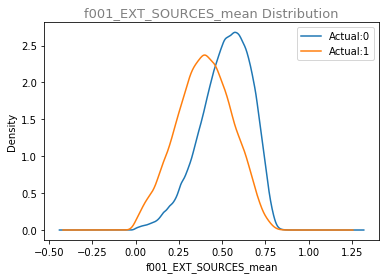

In [85]:
feature_vs_y(X.iloc[:,0], y)

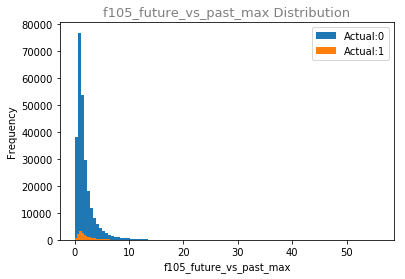

In [89]:
feature_vs_y(X.iloc[:,3], y, kind='hist')

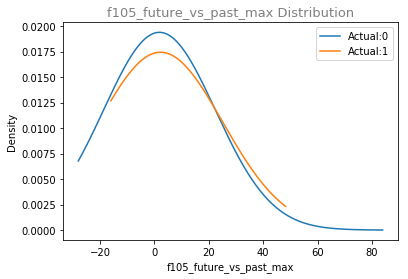

In [90]:
feature_vs_y(X.iloc[:,3], y, kind='kde', bw_method=10)

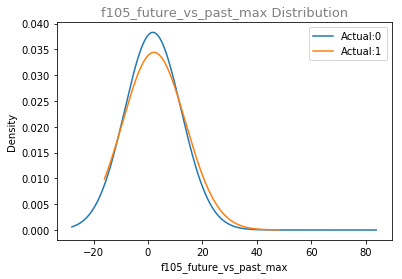

In [91]:
feature_vs_y(X.iloc[:,3], y, kind='kde', bw_method=5)